## Author : Indumathi Pandiyan

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;"> Recommendations Systems - 6th Project submitted for PGP-AIML Great Learning on 27-Feb-2022

**• DOMAIN:**Smartphone, Electronics <br>

**• CONTEXT:** India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the
right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system
based on individual consumer’s behaviour or choice. <br>

**• DATA Description:** <br>
* author : name of the person who gave the rating
* country : country the person who gave the rating belongs to
* data : date of the rating
* domain: website from which the rating was taken from
* extract: rating content
* language: language in which the rating was given
* product: name of the product/mobile phone for which the rating was given
* score: average rating for the phone
* score_max: highest rating given for the phone
* source: source from where the rating was taken

**PROJECT OBJECTIVE:**<br> We will build a recommendation system using popularity based and collaborative filtering methods to recommendmobile phones to a user which are most popular and personalised respectively..


## Steps and tasks: [ Total Score: 60 points]
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. [15 Marks]

In [1]:
### Importing Required Libraries
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats; 
from scipy.stats import zscore, norm, randint
plt.style.use('ggplot')


In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
#

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A. Merge all the provided CSVs into one data-frame. [2 Marks]

In [3]:
review_1 = pd.read_csv("Data Set\phone_user_review_file_1.csv")  # import the csv file
review_1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [4]:
review_2 = pd.read_csv("Data Set\phone_user_review_file_2.csv")  # import the csv file
review_2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [5]:
review_3 = pd.read_csv("Data Set\phone_user_review_file_3.csv")  # import the csv file
review_3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versões mel...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenção na entrega. O aparelho é mui...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [6]:
review_4 = pd.read_csv("Data Set\phone_user_review_file_4.csv")  # import the csv file
review_4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [7]:
review_5 = pd.read_csv("Data Set\phone_user_review_file_5.csv")  # import the csv file
review_5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [8]:
review_6 = pd.read_csv("Data Set\phone_user_review_file_6.csv")  # import the csv file
review_6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [9]:
review_1.shape

(374910, 11)

In [10]:
review_2.shape

(114925, 11)

In [11]:
review_3.shape

(312961, 11)

In [12]:
review_4.shape

(98284, 11)

In [13]:
review_5.shape

(350216, 11)

In [14]:
review_6.shape

(163837, 11)

In [68]:
frames = [review_1, review_2, review_3,review_4,review_5,review_6]
phone_review = pd.concat(frames, ignore_index=True) # ignore index helps in ignoring index and creating new ones

**Comments**: Ignore_index helps in ignoring existing indices and creating the new ones.

In [16]:
phone_review.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [17]:
phone_review.tail()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
1415128,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2.0,10.0,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
1415129,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10.0,10.0,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
1415130,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2.0,10.0,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
1415131,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8.0,10.0,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy
1415132,/cellphones/alcatel-ot-club_1187/,4/25/2000,de,de,Ciao,ciao.de,2.0,10.0,"Was sich Alkatel hier wieder ausgedacht hat,sc...",michaelawr,Alcatel Club Plus Handy


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">B. Explore, understand the Data and share at least 2 observations. [2 Marks]

In [18]:
phone_review.shape

(1415133, 11)

**Comments :** There are 1415133 records avaiable totally from all the dataset

In [19]:
phone_review.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


In [20]:
phone_review['author'].value_counts()

Amazon Customer     76978
Cliente Amazon      19304
e-bit                8663
Client d'Amazon      7716
Amazon Kunde         4750
                    ...  
Spider Pit              1
J A N                   1
L Rubens                1
i.andriewsky2010        1
J-pierre.H              1
Name: author, Length: 801103, dtype: int64

In [21]:
phone_review['product'].value_counts()

Lenovo Vibe K4 Note (White,16GB)             5226
Lenovo Vibe K4 Note (Black, 16GB)            4390
OnePlus 3 (Graphite, 64 GB)                  4103
OnePlus 3 (Soft Gold, 64 GB)                 3563
Huawei P8lite zwart / 16 GB                  2707
                                             ... 
Sony Ericsson Xperia U Siyah Cep Telefonu       1
Sony-Ericsson Z800i                             1
Смартфон Microsoft Lumia 435 Dual Sim           1
Motorola C123 silver Handy                      1
ZTE V880E DualSim                               1
Name: product, Length: 61313, dtype: int64

In [22]:
phone_review.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [23]:
phone_review['lang'].nunique()

22

In [24]:
phone_review['country'].nunique()

42

In [25]:
phone_review['source'].nunique()

331

In [26]:
phone_review['domain'].nunique()

384

In [27]:
phone_review['source'].value_counts().idxmax()

'Amazon'

In [28]:
pd

<module 'pandas' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [29]:
phone_review['country'].value_counts().idxmax()

'us'

In [30]:
phone_review['lang'].value_counts().idxmax()

'en'

In [31]:
phone_review['product'].value_counts().idxmax()

'Lenovo Vibe K4 Note (White,16GB)'

In [32]:
phone_review['author'].value_counts().idxmax()

'Amazon Customer'

In [33]:
phone_review_copy=phone_review.copy()

In [58]:
#phone_review.to_csv('phone_review.csv')

In [66]:
phone_review=phone_review_copy

### Observations

1. User rating is given as score that ranges between **0.2 to 10**. And  maximum score is 10 <br>
2. Out of 1415133 records, there are **801103** unique users and **61313** unique phone products are available<br>
3. The data consists of records in **22** languages and from **42** countries
4. The maximum review given by country "US" and the maximum review given in language english **"en"**
5. The source of review given most by  **"Amazon"**
6. As per the maximum number of rating the highest rated product is  **Lenovo Vibe K4 Note (White,16GB)'**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">C. Round off scores to the nearest integers. [3 Marks]

In [69]:
phone_review['score'].value_counts()

10.0    656239
8.0     296018
2.0     128485
6.0     116616
4.0      72462
         ...  
0.4          2
8.9          1
6.1          1
4.9          1
1.5          1
Name: score, Length: 86, dtype: int64

### Round the Review values to nearest integer

In [71]:
phone_review['score']=round(phone_review['score'])


In [74]:
phone_review['score']=phone_review['score'].fillna(0).astype('int32')

In [75]:
phone_review['score'].value_counts()

10    665748
8     305550
2     128762
6     118349
4      73333
0      63531
9      40602
7       8771
5       4730
1       3244
3       2513
Name: score, dtype: int64

In [34]:
##count Plot

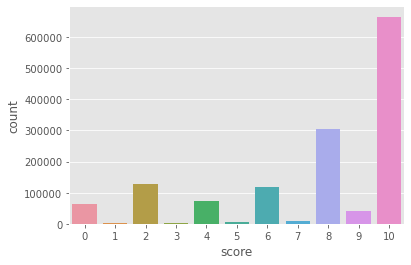

In [76]:
#plotting the graph  
sns.countplot(x='score',data=phone_review)  
plt.show() 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">D. Check for missing values. Impute the missing values, if any. [2 Marks]

In [77]:
## Method to check the missing value
def check_missingvlaue(data):
    percent_missing = round(data.isnull().sum() * 100 / len(data),2) #percentage of missing value
    missing_count=data.isnull().sum()
    missing_value_data = pd.DataFrame({'Feature Name': data.columns,
                                       'missing value count': missing_count,
                                       'percent_missing': percent_missing})
    print(missing_value_data)
    

### Checking the missing values

In [78]:
check_missingvlaue(phone_review)

          Feature Name  missing value count  percent_missing
phone_url    phone_url                    0             0.00
date              date                    0             0.00
lang              lang                    0             0.00
country        country                    0             0.00
source          source                    0             0.00
domain          domain                    0             0.00
score            score                    0             0.00
score_max    score_max                63489             4.49
extract        extract                19361             1.37
author          author                63202             4.47
product        product                    1             0.00


**Comments**<br>
 5 features has null values <br>
 1.score<br>
 2.score_max<br>
 3.extract<br>
 4.Author <br>
 5.Product <br>
 
 
 As per my observation as score is important for recommendation. If you ask me rather than impute with any values I would  prefer to drop them. <br>
 
 ###  Handling the Missing value
 
 * without product and score we cant use the data so will drop records where product and score is null <br>
 * Extract is not important for our recommendation building so impute with "Imputed Extract" <br>
 * Author we can specify as "Unknown" or "Ananymous", even the author is unknown those values would help us to build the model.
 
 

In [79]:
##
phone_review.shape

(1415133, 11)

In [80]:
# Removes the first row only
phone_review.dropna(how='all',inplace=True)

In [81]:
phone_review.shape

(1415133, 11)

### Drop all records where product  is nulll

In [82]:
# Drop all rows with NaNs in A OR B
phone_review.dropna(subset=['product'],inplace=True)

In [83]:
phone_review.shape

(1415132, 11)

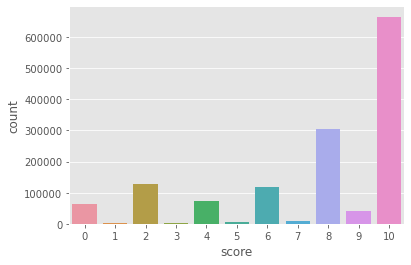

In [84]:
#plotting the graph  
sns.countplot(x='score',data=phone_review)  
plt.show()

Comments: As replaced with median the score values having 9 has increased

In [85]:
check_missingvlaue(phone_review)

          Feature Name  missing value count  percent_missing
phone_url    phone_url                    0             0.00
date              date                    0             0.00
lang              lang                    0             0.00
country        country                    0             0.00
source          source                    0             0.00
domain          domain                    0             0.00
score            score                    0             0.00
score_max    score_max                63489             4.49
extract        extract                19361             1.37
author          author                63201             4.47
product        product                    0             0.00


In [86]:
phone_review['author'] = phone_review['author'].fillna('UnKnown')

In [90]:
phone_review['extract'] = phone_review['extract'].fillna('Not Applicable')

In [92]:
phone_review['score_max'].median()

10.0

In [93]:
phone_review['score_max'] = phone_review['score_max'].fillna(phone_review['score_max'].median())

In [94]:
check_missingvlaue(phone_review)


          Feature Name  missing value count  percent_missing
phone_url    phone_url                    0              0.0
date              date                    0              0.0
lang              lang                    0              0.0
country        country                    0              0.0
source          source                    0              0.0
domain          domain                    0              0.0
score            score                    0              0.0
score_max    score_max                    0              0.0
extract        extract                    0              0.0
author          author                    0              0.0
product        product                    0              0.0


### Comments <br>

The missing values are imputed appropriately for building the recommendation

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">E. Check for duplicate values and remove them, if any. [2 Marks]

In [95]:
phone_review.duplicated().sum()

6436

In [96]:
duplicate = phone_review[phone_review.duplicated()]
  
print("Duplicate Rows :")

Duplicate Rows :


In [97]:
duplicate

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
342,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
343,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
371,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10,10.0,Tot nu toe in de eerste dagen weinig tot geen ...,Robin Winckens,Samsung Galaxy S8 Zwart
452,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10,10.0,Wat een huge scherm!,B Yapar,Samsung Galaxy S8 Zwart
3718,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
...,...,...,...,...,...,...,...,...,...,...,...
1398132,/cellphones/nokia-8850/,8/31/2010,ru,ru,Yandex,market.yandex.ru,10,10.0,"Просто отличный телефон, который приятно лежит...",UnKnown,Nokia 8850
1398134,/cellphones/nokia-8850/,6/25/2010,ru,ru,Yandex,market.yandex.ru,10,10.0,"За свои деньги, 1000 долларов которые он когда...",UnKnown,Nokia 8850
1410207,/cellphones/samsung-sgh-600/,4/30/2015,tr,tr,Cepworld,cepworld.com,0,10.0,varsa satan 05312614607,muhsin,Samsung (936) SGH-600
1411460,/cellphones/philips-genie-2000/,8/20/2000,it,it,Ciao,ciao.it,8,10.0,"Il Genie e' un buon telefono, scorrimente del ...",tonyblack,Philips Genie 2000


In [98]:
duplicate.shape

(6436, 11)

In [99]:
phone_review.shape

(1415132, 11)

In [100]:
phone_review=phone_review.drop_duplicates()

In [101]:
phone_review.shape

(1408696, 11)

**Observation:**
    6458 records data are removed and hence [1415132-6436=1408696 records retained after duplicate removal]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">F. Keep only 1 Million data samples. Use random state=612. [2 Marks]

In [102]:
phones=phone_review.sample(n = 1000000, random_state = 612)

In [83]:
phones.shape

(1000000, 11)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">G. Drop irrelevant features. Keep features like Author, Product, and Score. [2 Marks]

In [103]:
phones.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [104]:
useful_features=['author','product','score']
phones_df=phones[useful_features]

In [105]:
phones_df.shape

(1000000, 3)

In [106]:
phones_df.head()

,author,product,score
430175,Vinod Kumar Chengespur,"Lenovo Vibe K4 Note (White,16GB)",8
587153,Sharon,HTC Desire 816 Black (Virgin mobile) - 5.5 inc...,2
594786,An Sionnach,Xperia Sony Xperia Z Ultra SIM-free Android Sm...,8
636378,Jomine Jose,Lava Iris X5 (Black),2
684531,Marcos Rivero,Sony Xperia L C2105 White (Factory Unlocked) 4...,10


In [107]:
# find minimum and maximum ratings
print('The minimum Score is: %d' %(phones_df['score'].min()))
print('The maximum Score is: %d' %(phones_df['score'].max()))

The minimum Score is: 0
The maximum Score is: 10


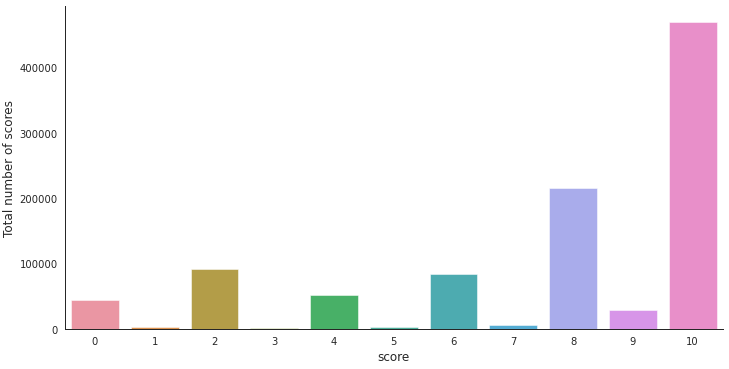

In [108]:
## Distribution of Rating
# Check the distribution of ratings 
with sns.axes_style('white'):
    g = sns.factorplot("score", data=phones_df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of scores") 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.Answer the following questions. [10 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">A. Identify the most rated features. [3 Marks]


In [109]:
phones_df['product'].nunique()

56438

### Most Rated Phones

In [110]:
most_rated_phones=phones_df['product'].value_counts().head(10)
most_rated_phones

Lenovo Vibe K4 Note (White,16GB)       3709
Lenovo Vibe K4 Note (Black, 16GB)      3083
OnePlus 3 (Graphite, 64 GB)            2890
OnePlus 3 (Soft Gold, 64 GB)           2522
Huawei P8lite zwart / 16 GB            1895
Samsung Galaxy Express I8730           1889
Lenovo Vibe K5 (Gold, VoLTE update)    1801
Samsung Galaxy S6 zwart / 32 GB        1669
Nokia 5800 XpressMusic                 1490
Lenovo Vibe K5 (Grey, VoLTE update)    1488
Name: product, dtype: int64

### Alternate way to find the Most Rated Features

In [111]:
## other way of getting top rated products
most_rated = phones_df.groupby('product').size().sort_values(ascending=False)[:10]
most_rated

product
Lenovo Vibe K4 Note (White,16GB)       3709
Lenovo Vibe K4 Note (Black, 16GB)      3083
OnePlus 3 (Graphite, 64 GB)            2890
OnePlus 3 (Soft Gold, 64 GB)           2522
Huawei P8lite zwart / 16 GB            1895
Samsung Galaxy Express I8730           1889
Lenovo Vibe K5 (Gold, VoLTE update)    1801
Samsung Galaxy S6 zwart / 32 GB        1669
Nokia 5800 XpressMusic                 1490
Lenovo Vibe K5 (Grey, VoLTE update)    1488
dtype: int64

### Plotting the most Rated Products

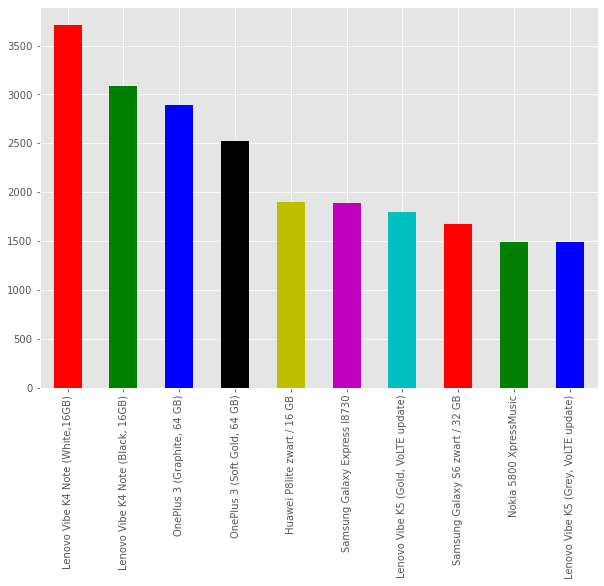

In [112]:
my_colors = list('rgbkymc')
plt.rcParams['figure.figsize'] = (10, 7)
most_rated_phones.plot(kind='bar',color=my_colors)
plt.show()

**Comments**: The top 10 products which have most rating is found and plotted in bar graph here

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">
B. Identify the users with most number of reviews. [3 Marks]

In [113]:
phones_df['author'].nunique()

596751

### Users with Most number of Reviews

In [114]:
most_reviewed_user=phones_df['author'].value_counts().head(10)
most_reviewed_user

Amazon Customer    54641
UnKnown            43867
Cliente Amazon     13669
e-bit               5962
Client d'Amazon     5499
Amazon Kunde        3281
Anonymous           1945
einer Kundin        1890
einem Kunden        1350
unknown             1198
Name: author, dtype: int64

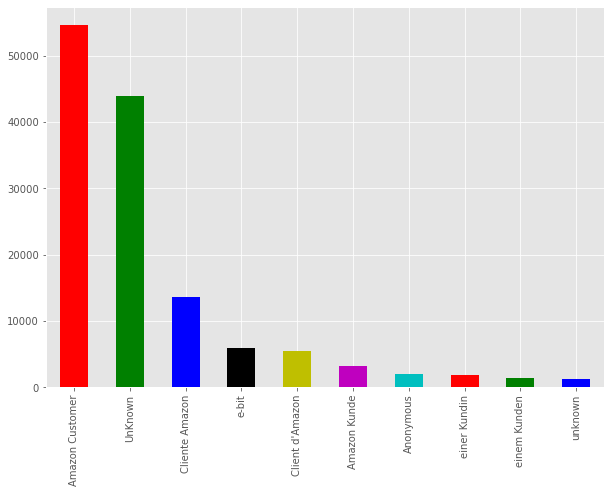

In [115]:
my_colors = list('rgbkymc')
most_reviewed_user.plot(kind='bar',color=my_colors)
plt.show()

**Comments**: The Amazon customer is the most reviewed user. But the second highest rank goes to Unknown

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">
C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final
dataset. [4 Marks]

In [116]:
len(phones_df['product'].value_counts()>50)

56438

In [117]:
phones_df['product'].value_counts()

Lenovo Vibe K4 Note (White,16GB)                                                        3709
Lenovo Vibe K4 Note (Black, 16GB)                                                       3083
OnePlus 3 (Graphite, 64 GB)                                                             2890
OnePlus 3 (Soft Gold, 64 GB)                                                            2522
Huawei P8lite zwart / 16 GB                                                             1895
                                                                                        ... 
NOKIA E90 Communicator Mocca - clavier AZERTY                                              1
Samsung (936) Galaxy S6 edge                                                               1
Apple iPhone 4S 8GB White                                                                  1
Lenovo A526 (Dark Blue)                                                                    1
Sony Mobile Xperia Z Ultra Smartphone sbloccato Bluetooth USB Android 

In [118]:
product_names=phones_df['product'].value_counts()

In [119]:
product_names

Lenovo Vibe K4 Note (White,16GB)                                                        3709
Lenovo Vibe K4 Note (Black, 16GB)                                                       3083
OnePlus 3 (Graphite, 64 GB)                                                             2890
OnePlus 3 (Soft Gold, 64 GB)                                                            2522
Huawei P8lite zwart / 16 GB                                                             1895
                                                                                        ... 
NOKIA E90 Communicator Mocca - clavier AZERTY                                              1
Samsung (936) Galaxy S6 edge                                                               1
Apple iPhone 4S 8GB White                                                                  1
Lenovo A526 (Dark Blue)                                                                    1
Sony Mobile Xperia Z Ultra Smartphone sbloccato Bluetooth USB Android 

In [120]:
product_names.describe

<bound method NDFrame.describe of Lenovo Vibe K4 Note (White,16GB)                                                        3709
Lenovo Vibe K4 Note (Black, 16GB)                                                       3083
OnePlus 3 (Graphite, 64 GB)                                                             2890
OnePlus 3 (Soft Gold, 64 GB)                                                            2522
Huawei P8lite zwart / 16 GB                                                             1895
                                                                                        ... 
NOKIA E90 Communicator Mocca - clavier AZERTY                                              1
Samsung (936) Galaxy S6 edge                                                               1
Apple iPhone 4S 8GB White                                                                  1
Lenovo A526 (Dark Blue)                                                                    1
Sony Mobile Xperia Z Ultra Smartphon

In [121]:
product_names[0]

3709

In [122]:
product_names.head(5)

Lenovo Vibe K4 Note (White,16GB)     3709
Lenovo Vibe K4 Note (Black, 16GB)    3083
OnePlus 3 (Graphite, 64 GB)          2890
OnePlus 3 (Soft Gold, 64 GB)         2522
Huawei P8lite zwart / 16 GB          1895
Name: product, dtype: int64

In [123]:
product_names.shape

(56438,)

In [124]:
product_names.nlargest

<bound method Series.nlargest of Lenovo Vibe K4 Note (White,16GB)                                                        3709
Lenovo Vibe K4 Note (Black, 16GB)                                                       3083
OnePlus 3 (Graphite, 64 GB)                                                             2890
OnePlus 3 (Soft Gold, 64 GB)                                                            2522
Huawei P8lite zwart / 16 GB                                                             1895
                                                                                        ... 
NOKIA E90 Communicator Mocca - clavier AZERTY                                              1
Samsung (936) Galaxy S6 edge                                                               1
Apple iPhone 4S 8GB White                                                                  1
Lenovo A526 (Dark Blue)                                                                    1
Sony Mobile Xperia Z Ultra Smartphone

In [125]:
phone_copy=phones_df.copy()

In [126]:

author=phones_df['author'].value_counts()
author = pd.DataFrame(author).reset_index()
author.columns = ['author', 'author_count']


In [127]:
phone_copy.head()

,author,product,score
430175,Vinod Kumar Chengespur,"Lenovo Vibe K4 Note (White,16GB)",8
587153,Sharon,HTC Desire 816 Black (Virgin mobile) - 5.5 inc...,2
594786,An Sionnach,Xperia Sony Xperia Z Ultra SIM-free Android Sm...,8
636378,Jomine Jose,Lava Iris X5 (Black),2
684531,Marcos Rivero,Sony Xperia L C2105 White (Factory Unlocked) 4...,10


In [128]:
phone_new = phone_copy.merge(author, how = 'left', on = ['author'])
display(phone_new.shape, phone_new.head())

(1000000, 4)

,author,product,score,author_count
0,Vinod Kumar Chengespur,"Lenovo Vibe K4 Note (White,16GB)",8,1
1,Sharon,HTC Desire 816 Black (Virgin mobile) - 5.5 inc...,2,49
2,An Sionnach,Xperia Sony Xperia Z Ultra SIM-free Android Sm...,8,1
3,Jomine Jose,Lava Iris X5 (Black),2,1
4,Marcos Rivero,Sony Xperia L C2105 White (Factory Unlocked) 4...,10,1


In [129]:
product=phones_df['product'].value_counts()

In [130]:
product.head()

Lenovo Vibe K4 Note (White,16GB)     3709
Lenovo Vibe K4 Note (Black, 16GB)    3083
OnePlus 3 (Graphite, 64 GB)          2890
OnePlus 3 (Soft Gold, 64 GB)         2522
Huawei P8lite zwart / 16 GB          1895
Name: product, dtype: int64

In [131]:
product = pd.DataFrame(product).reset_index()
product.head()
#product.columns = ['product', 'product_count']

,index,product
0,"Lenovo Vibe K4 Note (White,16GB)",3709
1,"Lenovo Vibe K4 Note (Black, 16GB)",3083
2,"OnePlus 3 (Graphite, 64 GB)",2890
3,"OnePlus 3 (Soft Gold, 64 GB)",2522
4,Huawei P8lite zwart / 16 GB,1895


In [132]:
product.columns = ['product', 'product_count']

In [133]:
product.head()

,product,product_count
0,"Lenovo Vibe K4 Note (White,16GB)",3709
1,"Lenovo Vibe K4 Note (Black, 16GB)",3083
2,"OnePlus 3 (Graphite, 64 GB)",2890
3,"OnePlus 3 (Soft Gold, 64 GB)",2522
4,Huawei P8lite zwart / 16 GB,1895


In [134]:
author.head()

,author,author_count
0,Amazon Customer,54641
1,UnKnown,43867
2,Cliente Amazon,13669
3,e-bit,5962
4,Client d'Amazon,5499


In [135]:
phone_auth_product = phone_new.merge(product, how = 'left', on = ['product'])


In [136]:
display(phone_auth_product.shape, phone_auth_product.head())

(1000000, 5)

,author,product,score,author_count,product_count
0,Vinod Kumar Chengespur,"Lenovo Vibe K4 Note (White,16GB)",8,1,3709
1,Sharon,HTC Desire 816 Black (Virgin mobile) - 5.5 inc...,2,49,169
2,An Sionnach,Xperia Sony Xperia Z Ultra SIM-free Android Sm...,8,1,33
3,Jomine Jose,Lava Iris X5 (Black),2,1,54
4,Marcos Rivero,Sony Xperia L C2105 White (Factory Unlocked) 4...,10,1,24


In [137]:
(phone_auth_product['product']=='LG GT540').sum()

50

In [138]:
# Number of unique Products and Authors in the data
print('Number of unique Products and Authors in the phones_df'); print('--'*30)
print('Number of unique Products in raw ratings dataframe = ', phone_auth_product['product'].nunique())
print('Number of unique Authors in raw ratings dataframe = ', phone_auth_product['author'].nunique())


Number of unique Products and Authors in the phones_df
------------------------------------------------------------
Number of unique Products in raw ratings dataframe =  56438
Number of unique Authors in raw ratings dataframe =  596751


### Getting the data that have more than 50 Author and product count

In [139]:
import numpy as np
print('Authors and products those who have given more than 50 number of ratings '); print('--'*40)
final_df=phone_auth_product[(phone_auth_product['author_count'] > 50) & (phone_auth_product['product_count'] > 50)]
final_df.head()
#phone_auth_product = phone_auth_product[filterConditions]


Authors and products those who have given more than 50 number of ratings 
--------------------------------------------------------------------------------


,author,product,score,author_count,product_count
5,Cliente Amazon,"Microsoft Telefonia Lumia 950 XL Smartphone, 3...",8,13669,54
12,UnKnown,Nokia E52,10,43867,703
16,Amazon Customer,Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...,2,54641,248
28,Anonymous,Samsung Rant,10,1945,53
40,Amazon Customer,"OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)",10,54641,1342


In [140]:
final_df.tail()

,author,product,score,author_count,product_count
999967,UnKnown,Nokia N73,8,43867,606
999978,Дмитрий,Samsung Galaxy A3 (2016),8,580,229
999984,Amazon Customer,"Lenovo PHAB Plus Tablet (6.8 inch, 32GB, Wi-Fi...",2,54641,324
999995,Андрей,Samsung S5830 Galaxy Ace,6,529,127
999997,e-bit,Smartphone Motorola Moto X 2ª Geração XT1097 3...,10,5962,390


In [142]:
final_df['product'].value_counts()

Lenovo Vibe K4 Note (White,16GB)                         2189
Lenovo Vibe K4 Note (Black, 16GB)                        1778
OnePlus 3 (Graphite, 64 GB)                              1305
OnePlus 3 (Soft Gold, 64 GB)                             1234
Lenovo Vibe K5 (Gold, VoLTE update)                      1109
                                                         ... 
Nokia Lumia 520 (Cyan)                                      1
Motorola Timeport P7389                                     1
Samsung I9500 Galaxy S4 White                               1
Samsung Galaxy S5 16GB (U.S. Cellular)                      1
Сотовый телефон ASUS ZenFone 2 Deluxe Special Edition       1
Name: product, Length: 4060, dtype: int64

In [143]:
final_df.shape


(129582, 5)

In [144]:
print('Selecting only author, product and Score column');
final = final_df[['author', 'product', 'score']]

Selecting only author, product and Score column


In [145]:
# Number of unique user id and product id in the data
print('Number of unique Author and products in the final Dataframe'); print('--'*40)
print('Number of unique Authors in filtered final dataframe = ', final['author'].nunique())
print('Number of unique Product in filtered final dataframe = ', final['product'].nunique())

Number of unique Author and products in the final Dataframe
--------------------------------------------------------------------------------
Number of unique Authors in filtered final dataframe =  644
Number of unique Product in filtered final dataframe =  4060


In [146]:
final.head()

,author,product,score
5,Cliente Amazon,"Microsoft Telefonia Lumia 950 XL Smartphone, 3...",8
12,UnKnown,Nokia E52,10
16,Amazon Customer,Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...,2
28,Anonymous,Samsung Rant,10
40,Amazon Customer,"OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)",10


In [147]:
# get count
score_count = pd.DataFrame(final.groupby('score').size(), columns=['count'])
score_count

,count
score,
0,4861
1,147
2,15052
3,137
4,7121
5,282
6,11026
7,649
8,26400


Text(0, 0.5, 'number of ratings')

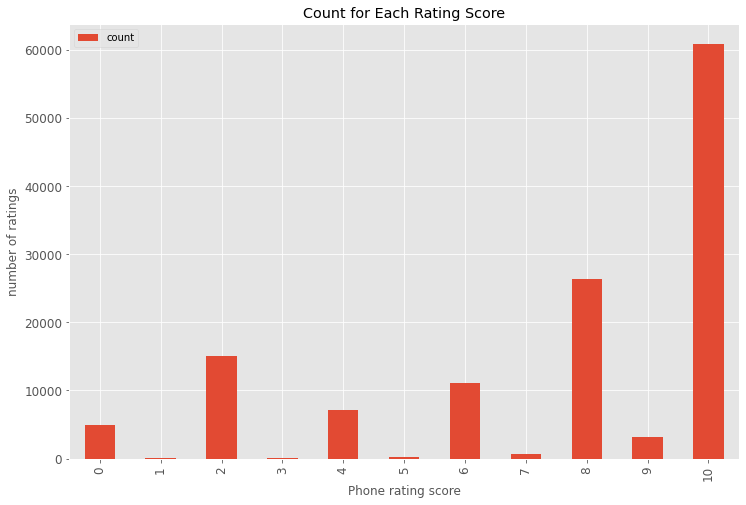

In [148]:
plt.style.use('ggplot')
ax = score_count[['count']].reset_index().rename(columns={'index': 'score'}).plot(
#ax = score_count.plot(
    x='score',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    #logy=True,
    fontsize=12,
)
ax.set_xlabel("Phone rating score")
ax.set_ylabel("number of ratings")

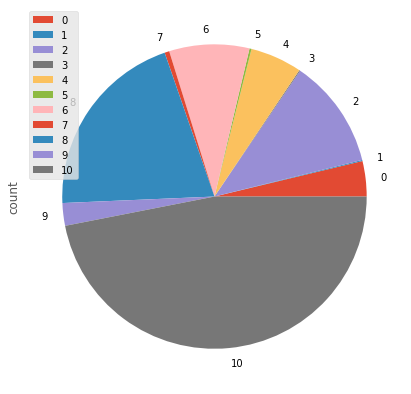

In [149]:
plt.rcParams['figure.figsize'] = (10, 7)
score_count.plot(kind='pie', subplots=True)
plt.show()

In [150]:
# get rating frequency
product_cnt = pd.DataFrame(final.groupby('product').size(), columns=['count'])
product_cnt.head()

,count
product,
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),5
6682 / 6681,1
"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)",18
"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)",22
"AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)",59


In [151]:
product_cnt.shape

(4060, 1)

### Observation:
There are around 4000 products (4060) in the final dataset

Text(0, 0.5, 'number of ratings')

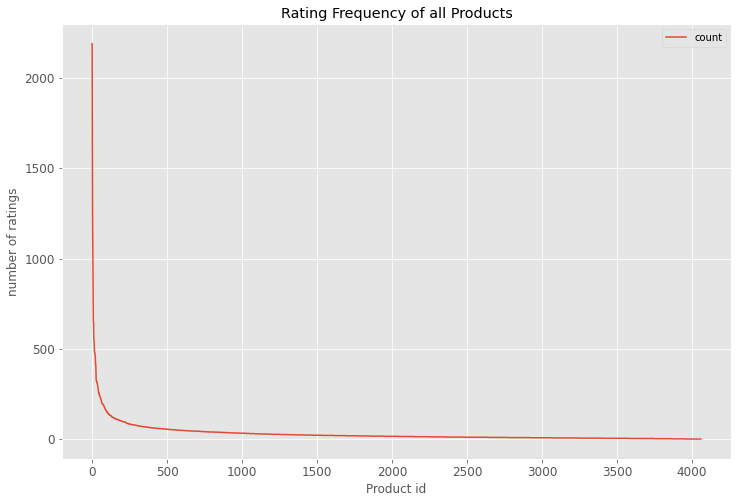

In [152]:
## Rating Frequency of of all products
# plot rating frequency of all movies
ax = product_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of all Products',
        fontsize=12
    )
ax.set_xlabel("Product id")
ax.set_ylabel("number of ratings")

#### comments <br>
* Only small fraction of product is reviewed frequently

Text(0, 0.5, 'number of ratings (log scale)')

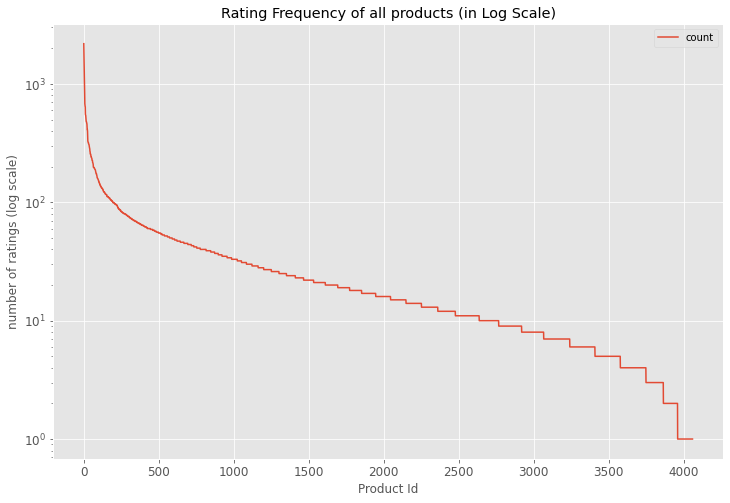

In [153]:
# plot rating frequency of all movies in log scale
ax = product_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of all products (in Log Scale)',
        fontsize=12,
        logy=True
    )
ax.set_xlabel("Product Id")
ax.set_ylabel("number of ratings (log scale)")

### Observation

Roughly 2000 products rated more than 10 times. and 3000 products rated less than 10 times.
and 1000 products rated more than 10 times may be around 50 times

In [154]:
product_cnt['count'].quantile(np.arange(1, 0.6, -0.05))

1.00    2189.0
0.95      99.0
0.90      62.1
0.85      48.0
0.80      40.0
0.75      33.0
0.70      27.0
0.65      23.0
Name: count, dtype: float64

### Obseration:
About 1% of products having more than 2310 rating. about 20% having 38 rating. 

In [155]:
# get number of ratings given by every user
users_count = pd.DataFrame(final.groupby('product').size(), columns=['count'])
users_count.head()

,count
product,
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),5
6682 / 6681,1
"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)",18
"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)",22
"AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)",59


Text(0, 0.5, 'number of ratings')

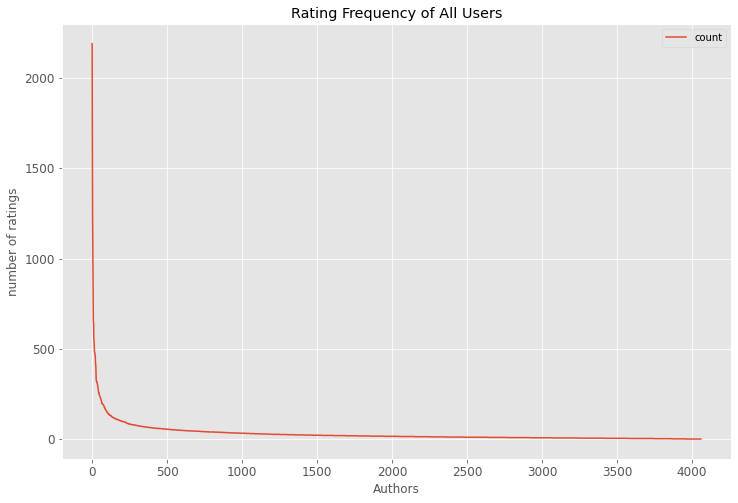

In [156]:
# plot rating frequency of all movies
ax = users_count \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Users',
        fontsize=12
    )
ax.set_xlabel("Authors")
ax.set_ylabel("number of ratings")

### Observation:
Only small fraction of users gave rating frequently

In [157]:
final.shape

(129582, 3)

#### Comments <br>
* After filtering the dataframe based on the products count and author count which are more than 50 each, we can come with data of **129582** records
* And if we see the score count the percentage of score having 10 is more than other scores

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. Build a popularity based model and recommend top 5 mobile phones. [5 Marks]

## To build a popularity model to recommend top 5 mobile phones

In [158]:
product_frequency= final['product'].value_counts()
print(product_frequency)

Lenovo Vibe K4 Note (White,16GB)                         2189
Lenovo Vibe K4 Note (Black, 16GB)                        1778
OnePlus 3 (Graphite, 64 GB)                              1305
OnePlus 3 (Soft Gold, 64 GB)                             1234
Lenovo Vibe K5 (Gold, VoLTE update)                      1109
                                                         ... 
Nokia Lumia 520 (Cyan)                                      1
Motorola Timeport P7389                                     1
Samsung I9500 Galaxy S4 White                               1
Samsung Galaxy S5 16GB (U.S. Cellular)                      1
Сотовый телефон ASUS ZenFone 2 Deluxe Special Edition       1
Name: product, Length: 4060, dtype: int64


### Approach trying to find out the popular phones by different ways

### 1. By using the sum of Score grouped by Product

In [159]:
rating_df=pd.DataFrame(final.groupby(['product'])['score'].sum())
top_5=rating_df.sort_values('score',ascending=False).head(5)
top_5

,score
product,
"Lenovo Vibe K4 Note (White,16GB)",15296
"Lenovo Vibe K4 Note (Black, 16GB)",12550
"OnePlus 3 (Graphite, 64 GB)",11140
"OnePlus 3 (Soft Gold, 64 GB)",10258
"Lenovo Vibe K5 (Gold, VoLTE update)",7284


### Comments:<br>
If the number of users are more , even if they rated less (<=5), it might come as high score. Hence not going with this approach

#### Let us verify the assumption

In [160]:
prod_cnt=(final['product']=='Lenovo Vibe K4 Note (White,16GB)').sum()
prod_cnt

2189

In [161]:
score_sum=final.loc[final['product'] == 'Lenovo Vibe K4 Note (White,16GB)'].score.sum()
score_sum

15296

In [162]:
avg=score_sum/prod_cnt
avg

6.987665600730927

### Comments:
Average score is only 6.9 for the first product for the above method. So we cannot use this for popularity assumption

### 2. By using the average Score

In [163]:
## Checking to find the model with Averge score
avg_rating_df=pd.DataFrame(final.groupby(['product'])['score'].mean())
top_5_avg=avg_rating_df.sort_values('score',ascending=False).head(5)
top_5_avg

,score
product,
LG Smartphone Tri Chip LG Optimus L4 II Desbloqueado Branco Android 3G Wi-Fi Câmera Memória Interna 4GB TV Digital,10.0
"LG Electronics G2 Smartphone (5,2 Zoll (13,2 cm) Touch-Display, 32 GB Speicher, Android 4.2) schwarz",10.0
Samsung Galaxy Mega 6.3 I9200 8GB Unlocked GSM Dual-Core Android Smartphone w/ 8 MP Camera - White,10.0
Samsung Galaxy Nexus | Black,10.0
Sony CMD Z5,10.0


### Observation :
We cannot assess these are top,as more phones have avg of 10.0, as there is a possibility that less reviewed product might be recommened. Let us verify the assumption

In [166]:
top_5_avg.shape

(5, 1)

### Finding the count of top 5 products

In [165]:
for index, row in top_5_avg.iterrows():
    #unique_id = i
    score = top_5_avg['score']
    #print('index=',index)
    prod_cnt=(final['product']==index).sum()
    print(index,'=',prod_cnt)
   # print('score=',score)

LG Smartphone Tri Chip LG Optimus L4 II Desbloqueado Branco Android 3G Wi-Fi Câmera Memória Interna 4GB TV Digital = 5
LG Electronics G2 Smartphone (5,2 Zoll (13,2 cm) Touch-Display, 32 GB Speicher, Android 4.2) schwarz = 4
Samsung Galaxy Mega 6.3 I9200 8GB Unlocked GSM Dual-Core Android Smartphone w/ 8 MP Camera - White = 5
Samsung Galaxy Nexus | Black = 3
Sony CMD Z5 = 2


### Comments
Even all the values has score as 10.0 , all top 5 count not greater than 5. Hence we cannot recommend this

## 3.To find the frequently rated product in the filtered list

### We will include only the products those have frequency more than 200

In [167]:
product_frequency= final['product'].value_counts()

In [168]:
frequently_rated_product=product_frequency[product_frequency>200].index
print(frequently_rated_product)

Index(['Lenovo Vibe K4 Note (White,16GB)', 'Lenovo Vibe K4 Note (Black, 16GB)',
       'OnePlus 3 (Graphite, 64 GB)', 'OnePlus 3 (Soft Gold, 64 GB)',
       'Lenovo Vibe K5 (Gold, VoLTE update)',
       'Lenovo Vibe K5 (Grey, VoLTE update)',
       'Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)',
       'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)',
       'Lenovo Vibe K5 (Silver, 16GB)', 'YU Yuphoria YU5010A (Black+Silver)',
       'OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)',
       'Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Bianco [Italia]',
       'Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB)',
       'Motorola Moto G Turbo (White, 16GB)', 'Apple iPhone 5s (Silver, 16GB)',
       'Lenovo Vibe K5 (Grey)',
       'Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocam

In [171]:
# Find the most rated product
popular_df=final[final['product'].isin(frequently_rated_product)]
avg_rating_df=pd.DataFrame(popular_df.groupby(['product'])['score'].mean())
top_5_avg_withFrequency=avg_rating_df.sort_values('score',ascending=False).head(5)
top_5_avg_withFrequency

,score
product,
"Apple iPhone 7 4,7"" 32 GB",9.776358
"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)",9.580029
"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G)",9.518280
"Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]",9.435737
"Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G)",9.404389


### Finding the frequency of top 5 product recommended

In [173]:
for index, row in top_5_avg_withFrequency.iterrows():
    #unique_id = i
    score = top_5_avg['score']
    #print('index=',index)
    prod_cnt=(final['product']==index).sum()
    print(index,'=',prod_cnt)
   # print('score=',score)

Apple iPhone 7 4,7" 32 GB = 313
Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G) = 681
Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G) = 465
Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania] = 319
Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G) = 319


#### Obeservation <br>
* The number of occurance also comparatively high for all these five products and has high average score

### Method to get the Top 5 products based on the Frequency threshold set

In [175]:
def popularity_based_model(data,frequency_threshold):
    product_frequency= data['product'].value_counts()
    frequently_rated_product=product_frequency[product_frequency>frequency_threshold].index
    # print(frequently_rated_product)
    # Find the most rated product
    popular_df=data[data['product'].isin(frequently_rated_product)]
    avg_rating_df=pd.DataFrame(popular_df.groupby(['product'])['score'].mean())
    top_5_avg_withFrequency=avg_rating_df.sort_values('score',ascending=False).head(5)
    return top_5_avg_withFrequency

In [176]:
top_5_products=popularity_based_model(final,200)
top_5_products

,score
product,
"Apple iPhone 7 4,7"" 32 GB",9.776358
"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)",9.580029
"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G)",9.518280
"Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]",9.435737
"Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G)",9.404389


### Top 5 Mobile Phones as per the model

In [177]:
top_5_products.index

Index(['Apple iPhone 7 4,7" 32 GB',
       'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)',
       'Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G)',
       'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]',
       'Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G)'],
      dtype='object', name='product')

### Comments<br>
* Based on the popularity model builds above 5 products are recommended. And its been observed that its have fairly high average score too.

<span style="font-family: Arial; font-weight:bold;font-size:1.75em;color:#00b3e5;">4. Build a collaborative filtering model using SVD. 

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;"> You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. Youcan try both user-based and item-based model. [10 Marks]

## SVD Based Recommendation System

**Collaborative Filtering :** is the most common technique used when it comes to building intelligent recommender systems that can learn to give better recommendations as more information about users is collected

#### Steps involved in Building Colloborative filtering

* The first step is to find similar users or items.
* The second step is to predict the ratings of the items that are not yet rated by a user.

In colloborative Filtering there are two methods <br>

**User-based:**  Here, we look for the users who have rated various items in the same way and then find the rating of the missing item with the help of these users.This  technique used to predict the items that a user mght like on the basis of ratings given to that item by the other users who have similar taste with that of the target user. <br>

**Item -based :** Here, we explore the relationship between the pair of items (the user who bought Y, also bought Z). We find the missing rating with the help of the ratings given to the other items by the user    




In [99]:
##conda install -c conda-forge scikit-surprise
#Installed  anaconda with powershell navigator

In [178]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.accuracy import rmse
from surprise import KNNWithMeans

In [179]:
final['score'].value_counts()

10    60794
8     26400
2     15052
6     11026
4      7121
0      4861
9      3113
7       649
5       282
1       147
3       137
Name: score, dtype: int64

### Load the data for processing and Split train and test data

In [180]:
#Instantiate reader object with Rating scale available
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(final[['author', 'product', 'score']], reader) ## Now data ready for processing
## split Train and Test data
# Split data to train and test

trainset, testset = train_test_split(data, test_size=.25,random_state=123)
trainset.all_ratings()
# However the ids are the inner ids and not the raw ids
# raw ids can be obatined as follows

print(trainset.to_raw_uid(0))
#print(trainset.to_raw_iid(1066))

e-bit


## 1. SVD Model

* One of the most powerful recommendation systems
* This is form of Matrix factorization
* Uses gradient Descent to create predictions for user rating
* Hence it minimizes RMSE


### Steps involved in SVD model Building
* 1. Instantiate the model
* 2. Fit Train set
* 3. Predict Test set
* 4. Evaluate the Accuracy

### 1. Instantiate model


In [181]:
svd_model = SVD(n_factors=5,biased=False)

### 2. Fit Train set

In [182]:
svd_model.fit(trainset)

### 3. Predict Test Set

In [183]:
test_pred = svd_model.test(testset)
test_pred

[Prediction(uid='Amazon Customer', iid='Lenovo A6000 (White, 8GB)', r_ui=2.0, est=6.041889330439148, details={'was_impossible': False}),
 Prediction(uid='Bill', iid='Motorola Moto G (2nd generation) Unlocked Cellphone, 8GB, Black', r_ui=6.0, est=7.5243501554698575, details={'was_impossible': False}),
 Prediction(uid='Anonymous ', iid='Samsung Galaxy S6 edge 32GB (AT&T)', r_ui=10.0, est=9.108998742405621, details={'was_impossible': False}),
 Prediction(uid='Alessio', iid='Palm Treo 650', r_ui=0.0, est=1, details={'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Lenovo Vibe K4 Note (White,16GB)', r_ui=10.0, est=7.330073400296547, details={'was_impossible': False}),
 Prediction(uid='Екатерина', iid='Samsung S7270 Galaxy Ace 3 (белый)', r_ui=10.0, est=6.995853086394605, details={'was_impossible': False}),
 Prediction(uid='UnKnown', iid='Nokia C6-01', r_ui=10.0, est=7.443165852611888, details={'was_impossible': False}),
 Prediction(uid="Client d'Amazon", iid='Honor 6X Smar

### 4. Evaluate the accuracy

In [184]:
# compute RMSE
svd_rmse=accuracy.rmse(test_pred)
print(svd_rmse)

RMSE: 2.7837
2.7836629220590767


## 2. KNNWithMeans Model

* KNN algorithms look at the nearest neighbors to determine which product to predict.
* KNN takes in different hyperparameters than SVD:  the similarity measure (example: cosine vs. pearson), 
    whether it is “user based” or not, with or without “min support”, and the minimum number of neighbors to take into account
    (denoted by “min k”). 
    

## Item Based KNN

### 1.instantiate the model

In [190]:
from surprise import KNNWithMeans
from surprise import accuracy
## Instantiate and Fit The Model
knn_model_item_based = KNNWithMeans(k=10, sim_options={ 'name':'cosine','user_based': False})


### 2.Fit Train set

In [191]:
knn_model_item_based.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


### 3.Predict with Test Set

In [192]:
knn_item_test_pred=knn_model_item_based.test(testset)

### 4.Evaluate Accuracy

In [193]:
knn_item_rmse=accuracy.rmse(knn_item_test_pred)

RMSE: 2.7991


## User Based KNN Collaboration System

### 1.instantiate the model and Fit Trainset

In [195]:
knn_model_user = KNNWithMeans(k=10, sim_options={ 'name':'cosine','user_based': True})
knn_model_user.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


### 2.Predict with Test Set

In [196]:
knn_user_test_pred=knn_model_user.test(testset)

### 3.Evaluate accuracy

In [199]:
knn_user_rmse=accuracy.rmse(knn_user_test_pred)

RMSE: 2.7869


In this case, the RMSE is 2.78, meaning that our model’s predictions miss the actual ratings by approximately 2.7 points. On a rating scale of 1-10, which was used for this model, this result is not too bad (a rating of 5.0 vs. 7.7 doesn’t drastically change whether or not we can assume that someone liked a product or not).

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">5.Evaluate the collaborative model. Print RMSE value. [2 Marks]

<AxesSubplot:>

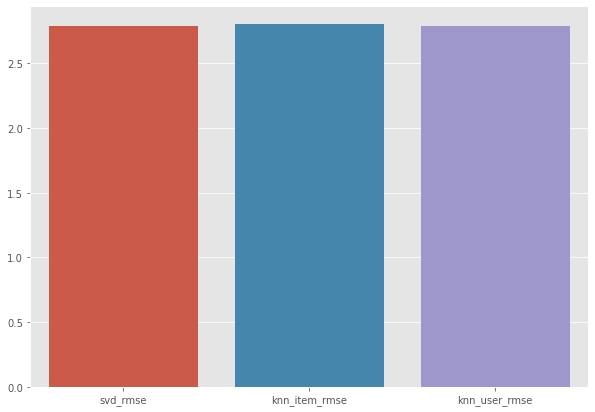

In [207]:
# Evaluate the Collaborative model by comparing RMSE
#width = [0.5]
sns.barplot(x=['svd_rmse','knn_item_rmse', 'knn_user_rmse'],y=[svd_rmse,knn_item_rmse, knn_user_rmse])

In [210]:
display('SVD Model',svd_rmse,'knn_item_based',knn_item_rmse, 'knn_user_based',knn_user_rmse)

'SVD Model'

2.7836629220590767

'knn_item_based'

2.799089194270173

'knn_user_based'

2.7869441853582773

### Comments: <br>
    Almost all 3 models have nearly same RMSE value. Comparatively SVD has less RMSE. We will try wit Cross validation to reduce the RMSE
    

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">6. Predict score (average rating) for test users. [2 Marks]

### Test Prediction of SVD

In [224]:
svd_pred_df=pd.DataFrame(test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',svd_pred_df['est'].mean())
print('average rating  by test users: ',svd_pred_df['rui'].mean())
print('average prediction error for test users: ',(svd_pred_df['rui']-svd_pred_df['est']).abs().mean())

average prediction for test users:  7.541643226695413
average rating  by test users:  7.547351524879614
average prediction error for test users:  2.1905550704899417


### Test Prediction of Knn Item Based

In [226]:
knn_item_pred_df=pd.DataFrame(knn_item_test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knn_item_pred_df['est'].mean())
print('average rating  by test users: ',knn_item_pred_df['rui'].mean())
print('average prediction error for test users: ',(knn_item_pred_df['rui']-knn_item_pred_df['est']).abs().mean())

average prediction for test users:  7.551543652436459
average rating  by test users:  7.547351524879614
average prediction error for test users:  2.1825913589705097


### Test Prediction of Knn user Based

In [228]:
knn_user_pred_df=pd.DataFrame(knn_user_test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
print('average prediction for test users: ',knn_user_pred_df['est'].mean())
print('average rating  by test users: ',knn_user_pred_df['rui'].mean())
print('average prediction error for test users: ',(knn_user_pred_df['rui']-knn_user_pred_df['est']).abs().mean())

average prediction for test users:  7.560485119879121
average rating  by test users:  7.547351524879614
average prediction error for test users:  2.1707934724006113


### Comments:

Average predictions for test users is **7.5** in alll 3 models. Error is prediction is approaximately *2.17* in user based model which is little lesser than other two models


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">7. Report your findings and inferences. [2 Marks]

S.No | Model Name     | Average Prediction Test User | Average Rating by Test User | Average Prediction Error
-----|----------------|------------------------------|-----------------------------| --------------------------
1    | SVD Model      | 7.541643226695413            |  7.547351524879614          | 2.1905550704899417
2    | KNN item based | 7.551543652436459            | 7.547351524879614           | 2.1825913589705097
3    | Knn User based | 7.560485119879121            | 7.547351524879614           | 2.1707934724006113

#### Observations:
    
* Among three models after prediction, the Knn user based have lesser error compared to other 2 models
* Surprisingly average rating for Test users are same for all 3 models
* Based on most popular model **Apple iPhone 7 4,7 32 G ** has the highest averge score among all
* People scored to even numbers rather than odd numbers it might be due to rating received in 5 scale and converted to 10 score
* User based recommendation with KNN performs better during prediction


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">8. Try and recommend top 5 products for test users. [5 Marks]

In [234]:
# Objective: To get top_n recommendation for each user
from collections import defaultdict
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [236]:

#recommend top 5 products for test users
top_5 = get_top_n(knn_user_test_pred,5)
print('Top 5 recommendations for all test users are: \n')
for key,value in top_5.items(): print(key,'-> ',value,'\n')

Top 5 recommendations for all test users are: 

Amazon Customer ->  [('Samsung Galaxy Grand Prime SM-G530H (Grey, 8GB)', 10), ('Apple iPhone SE Unlocked Phone - 64 GB Retail Packaging - Rose Gold', 10), ('Samsung Galaxy S III, Purple 16GB (Sprint)', 10), ('Motorola Atrix HD MB886 4G LTE Android Smart Phone (GSM Unlocked) - Dual-Core, 8MP Camera - Black', 10), ('Samsung Galaxy S III, Purple 16GB (Sprint)', 10)] 

Bill ->  [('Samsung Galaxy Discover', 10), ('Samsung Eternity', 9.337707786526684), ('Sim Free Motorola Moto G4 Play- Black', 8.56738954133397), ('Huawei Honor 8 Unlocked Smartphone 32 GB Dual Camera - US Warranty (Sapphire Blue)', 8.165986679110294), ('BLU VIVO 5R Refresh Smartphone - 5.5-Inch Display 4G LTE GSM Unlocked, GOLD', 7.972468120625523)] 

Anonymous  ->  [('LG D855', 10), ('Samsung Galaxy S III 16GB (Verizon)', 10), ('Samsung Galaxy S III 16GB (Verizon)', 10), ('LG D855', 10), ('Samsung Galaxy S6 edge+ 32GB (Sprint)', 10)] 

Alessio ->  [('Lenovo Motorola Moto G LTE

Kate ->  [('Motorola Moto G 3rd Generation LTE UK SIM-Free Smartphone - Black', 10), ('Samsung Galaxy J5 2016 Sim Free Mobile Phone - White', 8.822814188762669), ('HUAWEI P9 Lite - 16 GB, Black', 8.814637362378548), ('HUAWEI P9 Lite - 16 GB, Black', 8.814637362378548), ('Samsung Galaxy J3 2016 Sim Free Mobile Phone - Black', 8.331408875242216)] 

lethe ->  [('Nokia N82 Cep Telefonu', 1), ('Samsung U900 1GB Cep Telefonu', 1), ('Nokia 5310 Cep Telefonu', 1), ('Nokia 6300 Cep Telefonu', 1), ('Nokia 5310 Cep Telefonu', 1)] 

bedduamiz ->  [('Nokia E90 Cep Telefonu', 1), ('Nokia 5300 XpressMusic Cep Telefonu', 1), ('Nokia 6288 Cep Telefonu', 1), ('Nokia N70 Cep Telefonu SILVER BLACK', 1), ('Nokia 6300 Cep Telefonu', 1)] 

schreef ->  [('Samsung Galaxy S7 edge', 10), ('Samsung Galaxy A5 (2016)', 10), ('Samsung Galaxy S7 edge', 10), ('Samsung Galaxy J3 (2016)', 9.4), ('Samsung Galaxy J3 (2016)', 9.4)] 

pedro ->  [('Lenovo Motorola Moto G (3a Generación) - Smartphone libre Android (4G, 5", 13

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">9. Try other techniques (Example: cross validation) to get better results. [3 Marks]

## Cross valiation for SVD model, KNN item based and User Based

In [243]:
# cross validation score
from surprise.model_selection import cross_validate

In [242]:
svd_cv = cross_validate(svd_model,data, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean svd cv score:', round(svd_cv['test_rmse'].mean(),2),'\n')
svd_cv


 Mean svd cv score: 2.8 



{'test_rmse': array([2.80099296, 2.82149012, 2.81702757, 2.79625825, 2.76155505]),
 'fit_time': (1.7068333625793457,
  1.5659844875335693,
  1.6708228588104248,
  1.5976626873016357,
  1.6296942234039307),
 'test_time': (0.16436004638671875,
  1.4984261989593506,
  0.12366437911987305,
  0.1186823844909668,
  0.13959622383117676)}

In [248]:
cv_knn_item_based = cross_validate(knn_model_item_based,data, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean of cv_knn_item_based score:', round(cv_knn_item_based['test_rmse'].mean(),2),'\n')
cv_knn_item_based

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.

 Mean of cv_knn_item_based score: 2.82 



{'test_rmse': array([2.7933582 , 2.85103829, 2.80876801, 2.8267198 , 2.82988761]),
 'fit_time': (206.3041868209839,
  213.7365643978119,
  197.35248351097107,
  203.11611413955688,
  211.90627670288086),
 'test_time': (245.0111768245697,
  238.41536808013916,
  237.9913785457611,
  233.53376245498657,
  270.4068486690521)}

In [ ]:
## User based


In [249]:
cv_knn_user_based = cross_validate(knn_model_user,data, measures=['RMSE'], cv=5, verbose=False)
print('\n Mean of cv_knn_user_based score:', round(cv_knn_user_based['test_rmse'].mean(),2),'\n')
cv_knn_user_based


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.

 Mean of cv_knn_user_based score: 2.81 



{'test_rmse': array([2.82732006, 2.82454761, 2.79596615, 2.80644652, 2.81468267]),
 'fit_time': (1.7616562843322754,
  1.7695260047912598,
  1.6451025009155273,
  1.6276087760925293,
  1.640866994857788),
 'test_time': (2.6302740573883057,
  2.5974507331848145,
  2.596815586090088,
  2.5951087474823,
  2.5511322021484375)}

### Comments:

* Cross validation is done for all the 3 models, the mean RMSE is as follows

Mode Name | Mean RMSE on Cross validation
------------- | -------------
SVD model  |2.8
KNN item based |2.82
KNN user based | 2.81

All the 3 models RMSE_mean after Cross validation almost same. But SVD model(**2.8**) is best comparted to other two.<br>
* However, Item based approach is usually **preferred** over user-based approach. <br>
* **User-based approach** is often **harder to scale**because of the dynamic nature of users,<br>
* whereas items usually don’t change much, and item based approach often can be computed offline and served without constantly re-training.<br>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">10. In what business scenario you should use popularity based Recommendation Systems ? [2 Marks]

Popularity based recommendation system helps to find the popular item or item in Trend. 
* This Recommendation system can be used in pleothera of domains
* In **media**, it helps to recommend popular movies , songs, audio books, videos etc
* In **Job search** sites, it would help to recommend popular vacancies or job recommendations
* In **telecom industry** also this can be used. As telecom products and services are less, its simple recommendation system.
* In **travel and tourism**, this can be used to recommend popular tourist spots
* In **online food delivery**, the popular food can be recommended for newly signed up users
* Most **popular restaurants** or hotels on city can be recommended.

The above list describes the possible domains where popularity based recommender system is used.

Apart from the above, following are the business scenarios to use Popularity based Recommendation system.

**Scenario 1: Customer retention or customer engagement** :<br>
If you want to retain the customer from going away to another product or site by recommending the best products available.
For example, the Netflix can recommend the popular movies available, so the user will think of adding that into watchlist rather than looking for good movies in other site.

**Scenario 2: Product Reach** :<br>
To increase the product Reach. For example this recommendation system,recommending popular items product reach to customer is made easy.


**Scenario 3: Improve Return on Investment** :<br>
By simply recomending the popular items, makes the customer to purchase more rather than any other specific advertisement which will increase the Return on Investment on Business.

**Scenario 4: Influnce clueless Shopper** : <br>
While a shopper is clueless the poularity based RS is like a boon persuading him for the right purchase

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">11. In what business scenario you should use CF based Recommendation Systems ? [2 Marks]

Collaborative Filtering is a very powerful mechanism which works on product user data based on the User Affinities and user shopping behaviour.

**Scenario 1 : To Recommend Product** <br>
Based on the user history and behaviour prodcucts can be recommeneded based on the similiar user behaviour.

**Scenario 2 : Improve user experience** <br>
As products or services are recommended based on his preferences or choices made before, user wil be delighted to see the recommendations coming up automatically with his interest.

**Scenario 3 : Increase sales and cross selling** <br>
As items can be recommmended based on user behaviour, when we need to increase more sales, the recommendation system can be usee.

coming up automatically with his interest.

**Scenario 4 : To improve the related learning** <br>
Recommendation systems can be used when you suggest some thing related to the knowledge base user is looking for. Example the course can be recommended based on the user baheviour and interest so he can make best choices. Similarly in college or schools this systems can be used to suggest related books and subject that would help individual to gain the depth of knowledge as we recommend what kind of books or courses the similar user is going through.



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">12. What other possible methods can you think of which can further improve the recommendation for different users ? [2 Marks]

 Recommendation system is having wide scope. This can be either more specialized or generalised as per needs Following are some of the possible methods I can think of
    
* Giving recommendation based on Demography, as choices vary according to the demography
* Recommend options based on the experience/ qualification  a user have , so the recommendation can be more specific to him.
* Hybrid systems to give both popularity based and personalised to improve their experience
* Interactive Recommendation to cope up users current expectation
* Context based recommendations rather than general one
* In health care Recommendation systems would be helpful for the doctors to analyse the patient health based on similar patients health history
